In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from matplotlib import gridspec
import matplotlib

# Helper functions

These are borrowed from the `Convert.ipynb` file.

In [2]:
headings = ['Building Identifier',
            'Country',
             'City',
             'Quality / Stage of Data',
             'Construction Date',
             'Building Type',
             'Gross Floor Area']

In [3]:
df = pd.read_excel('../Dataset/dataset.xlsx',header=1).drop('Unnamed: 0',axis=1)

In [4]:
df

,Building Identifier,Country,City,Quality / Stage of Data,Construction Date,Building Type,Gross Floor Area,000_G2010.20.000_03 00 00.00_kg_1,000_B1010.20.000_03 00 00.00_kg_1,000_C1010.10.000_04 22 00.00_kg_1,...,000_B2010.10.000_07 46 16.00_kg_2,001_B2010.80.000_07 27 00.00_kg_2,001_B2010.80.000_07 21 13.00_kg_2,001_B2010.10.000_09 24 23.00_kg_2,0B1_A5020.10.000_06 11 00.00_kg_2,0B1_A5020.10.000_06 11 00.00_kg_1,0B1_A5020.10.000_09 21 16.00_kg_1,000_C1010.10.000_07 21 13.00_kg_1,00R_B3010.90.000_07 21 13.00_kg_1,00R_B1020.20.000_07 51 13.00_kg_1
0,1,CA,TOR,00IFC,2021,SND,521.18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,CA,TOR,00IFC,2021,SND,389.24,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,CA,TOR,00IFC,2021,SND,411.64,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,CA,TOR,00IFC,2021,SND,269.56,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,CA,TOR,00IFC,2011,OFF,11248.00,13704.0,1.776816e+06,19397.560000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,CA,TOR,00IFC,2011,APB,11317.00,NaN,1.514400e+06,53877.650000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,CA,TOR,00IFC,2021,SND,445.99,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,CA,TOR,00IFC,2021,SND,438.45,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,CA,TOR,00IFC,2021,SND,714.07,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,CA,TOR,00IFC,2021,SND,343.24,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
name_conversion = pd.read_csv('name_conversion.csv')
building_name_conversion = pd.read_csv('building_type_name_conversion.csv')

In [6]:
building_name_map = {k['Building Code']:k['Building Type'] for _,k in building_name_conversion.iterrows()}

In [7]:
name_map = {k.Code:k.Category for _,k in name_conversion.iterrows()}

In [8]:
additional_categories_map = {v:k for k,v in {
    'Continuous Footings':'0CF',
    'Foundation Walls':'0FW',
    'Spread Footings':'0SF',
    'Column Piers':'0CP',
    'Columns Supporting Floors':'CSF',
    'Floor Girders and Beams':'FGB',
    'Floor Trusses':'0FT',
    'Floor Joists':'0FJ',
    'Columns Supporting Roofs':'CSR',
    'Roof Girders and Beams':'RGB',
    'Roof Trusses':'0RT',
    'Roof Joists':'0RJ',
    'Parking Bumpers':'0PB',
    'Precast Concrete Stair Treads':'PCS',
    'Roof Curbs':'0RC',
    'Exterior Wall Construction':'EWC',
    'Composite Decking':'CPD',
    'Cast-in-Place concrete':'CIC',
    'Floor Structural Frame':'FSF',
    'Associated Metal Fabrications':'AMF',
    'Floor Construction Supplementary Components':'FCS',
    'Roof Construction Supplementary Components':'RCS',
    'Residential Elevators':'0RE',
    'Vegetated Low-Slope Roofing':'VLR',
    'Swimming Pools':'SWP',
    'Excavation Soil Anchors':'ESA',
    'Floor Trusses':'FTS',
    'Roof Window and Skylight Performance':'RWS',
    'Rainwater Storage Tanks':'RST',
    'Gray Water Tanks':'GWT'}.items()
}

additional_categories_map['0FT'] = 'Floor Trusses'

# 1. Plot sample figures

Here we plot building material mass, and volume histograms.

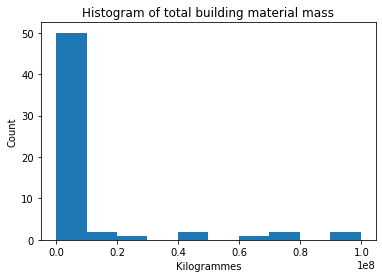

In [9]:
plt.hist(df[[c for c in df.columns if 'kg' in c]].sum(axis=1));
plt.title('Histogram of total building material mass')
plt.xlabel('Kilogrammes')
plt.ylabel('Count');

# 2. Investigate a specific material

In this example, we select only columns that match the MasterFormat code for Structural Concrete. Then, we aggregate based on Level 2 UniFormat code.

In [10]:
cols = [d for d in df.columns if '03 31 00' in d]

In [11]:
f = lambda x: re.split('[_\.\ ]',x)[1][0:3]
concrete_df = pd.concat([df[headings],df[cols].groupby(f,axis=1).sum()],axis=1).rename(columns=name_map)

In [12]:
concrete_df

,Building Identifier,Country,City,Quality / Stage of Data,Construction Date,Building Type,Gross Floor Area,Foundations,Subgrade Enclosures,Slabs-On-Grade,Substructure Interior,Substructure Related Activities,Superstructure,Exterior Vertical Enclosures,Exterior Horizontal Enclosures,Interior Construction,Conveying,Plumbing,Special Construction,Site Improvements
0,1,CA,TOR,00IFC,2021,SND,521.18,1.709236e+05,0.0,6.721219e+04,0.0,0.0,1.938810e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,CA,TOR,00IFC,2021,SND,389.24,1.082862e+05,0.0,3.576043e+04,0.0,0.0,1.397610e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,CA,TOR,00IFC,2021,SND,411.64,1.909299e+05,0.0,3.246461e+04,0.0,0.0,1.528710e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,CA,TOR,00IFC,2021,SND,269.56,6.736923e+04,0.0,1.595211e+04,0.0,0.0,1.212090e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,CA,TOR,00IFC,2011,OFF,11248.00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,CA,TOR,00IFC,2011,APB,11317.00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,CA,TOR,00IFC,2021,SND,445.99,1.295202e+05,0.0,3.521918e+04,0.0,0.0,5.332590e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,CA,TOR,00IFC,2021,SND,438.45,1.174431e+05,0.0,4.289057e+04,0.0,0.0,1.970790e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,CA,TOR,00IFC,2021,SND,714.07,1.927680e+05,0.0,8.446873e+04,0.0,0.0,4.049670e+03,0.0,0.0,11307.2,0.0,0.0,0.0,0.0
9,10,CA,TOR,00IFC,2021,SND,343.24,9.564723e+04,0.0,2.033114e+04,0.0,0.0,9.440170e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0


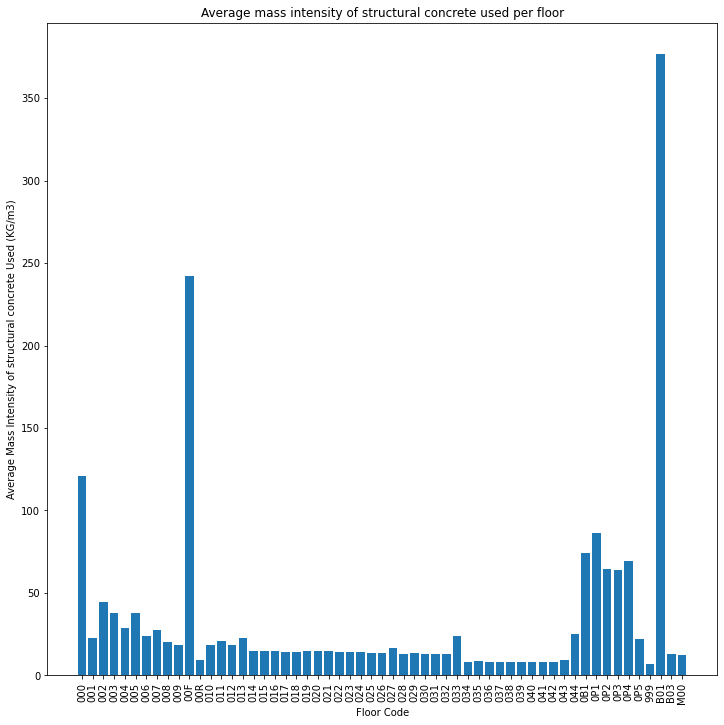

In [13]:
grouping_function = lambda x: x.split('_')[0] #This function takes in a full column name, like "000_G2010.20.000_03 00 00.00_m3_1", and returns only the floor.
to_draw = df[cols].groupby(grouping_function,axis=1).sum().replace(0,np.NaN).div(df['Gross Floor Area'],axis='rows').mean()
plt.figure(figsize=(12,12))
plt.bar(to_draw.keys(), to_draw.values)
plt.xticks(rotation=90)
plt.title('Average mass intensity of structural concrete used per floor')
plt.ylabel('Average Mass Intensity of structural concrete Used (KG/m3)')
plt.xlabel('Floor Code');

Now, we will aggregate to Level 3 MasterFormat codes, and display these values for the first three entries.

In [14]:
f = lambda x: name_map[re.split('[_\.\ ]',x)[1][0:3]] #This function takes in a full column name and returns only the Level 3 MasterFormat code.
concrete_df = df[cols].groupby(f,axis=1).sum()

In [15]:
concrete_df.mean().sort_values(ascending=False)

Superstructure                     2.156826e+06
Substructure Interior              1.016670e+06
Foundations                        6.750260e+05
Interior Construction              5.426285e+05
Subgrade Enclosures                2.447624e+05
Conveying                          1.525784e+05
Slabs-On-Grade                     9.043012e+04
Exterior Vertical Enclosures       2.899600e+04
Exterior Horizontal Enclosures     2.883760e+04
Substructure Related Activities    1.309240e+04
Special Construction               6.064400e+03
Plumbing                           5.850000e+03
Site Improvements                  1.932400e+03
dtype: float64

## Pie chart version A: on-pie chart labels for all > 1%

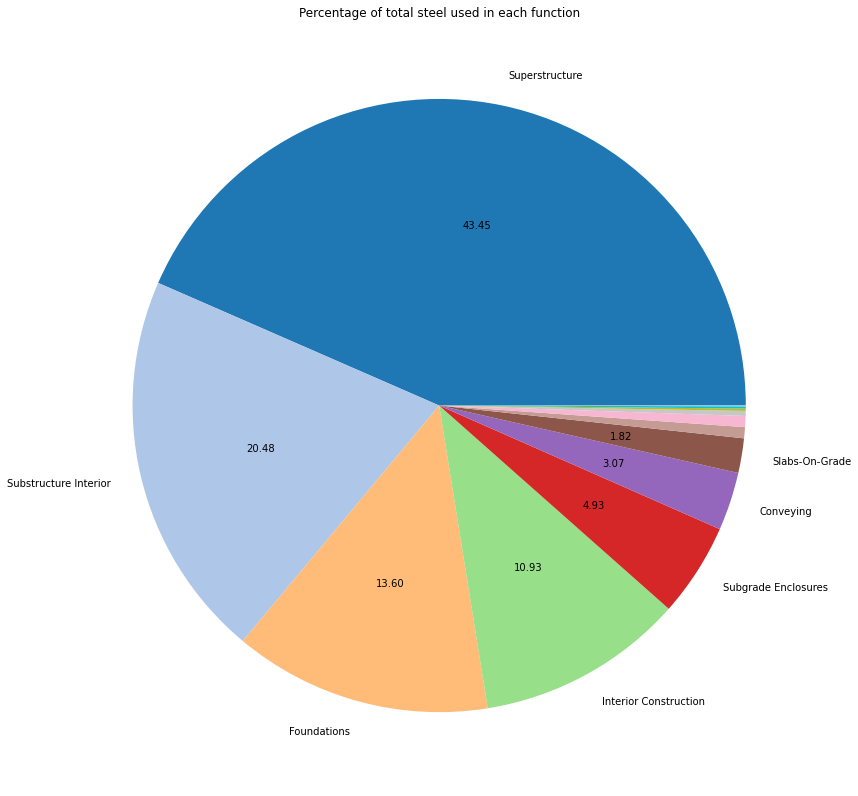

In [16]:
def my_autopct(pct):
    return ('%.2f' % pct) if pct > 1 else ''
to_plot = concrete_df.mean().sort_values(ascending=False)
to_plot.plot.pie(figsize=(12,12),colormap='tab20',autopct=my_autopct,labels=[k if v > 30000 else '' for k,v in to_plot.items()])
plt.ylabel('')
plt.title('Percentage of total steel used in each function');
# plt.legend(loc='center left',bbox_to_anchor=(-0.20, 0.75));
plt.tight_layout();

## Pie version B: external legend with slice labels

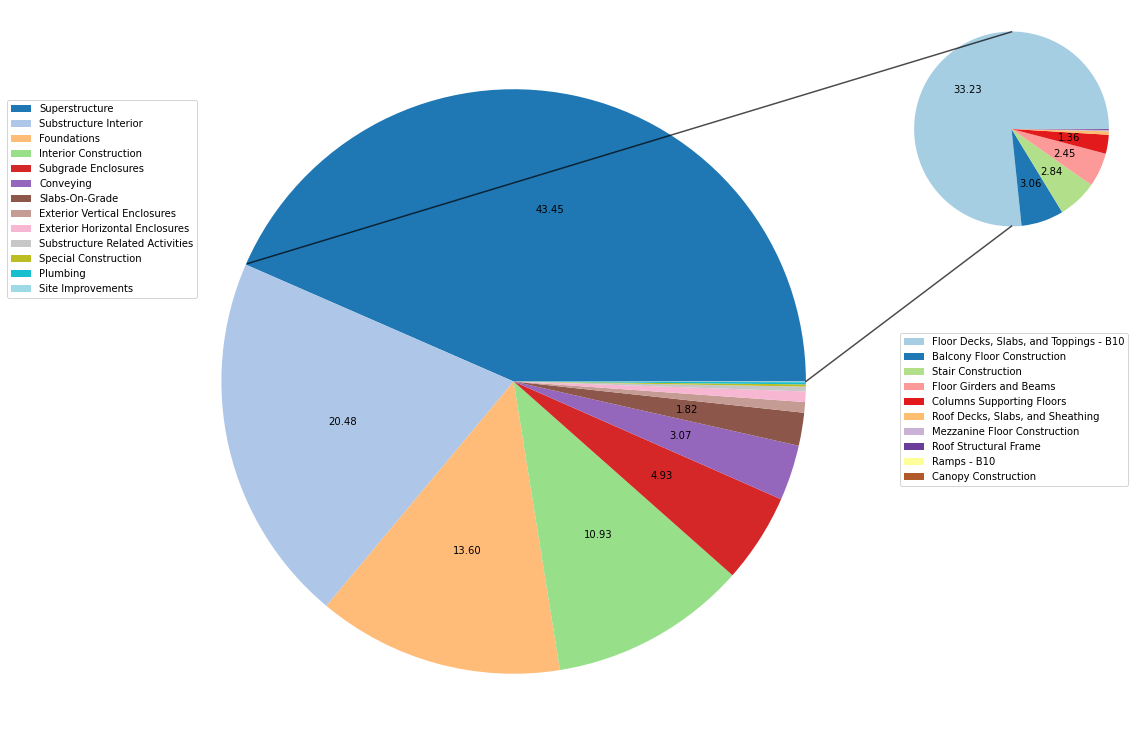

In [17]:
fig = plt.figure(figsize=(16,12)) 
gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1])
ax0 = plt.subplot(gs[:,0])

def my_autopct(pct):
    return ('%.2f' % pct) if pct > 1 else ''
to_plot = concrete_df.mean().sort_values(ascending=False)
to_plot.plot.pie(ax=ax0,colormap='tab20',autopct=my_autopct,labeldistance=None)
plt.ylabel('')
plt.legend(loc='center left',bbox_to_anchor=(-0.20, 0.75));
plt.tight_layout();

ax1 = plt.subplot(gs[0,1])
f = lambda x: \
    additional_categories_map[re.split('[_\.\ ]',x)[3]] \
    if \
    re.split('[_\.\ ]',x)[3] != '000' \
    else \
    name_map['.'.join(re.split('[_\.\ ]',x)[1:3])]

superstructure_df = df[[c for c in cols if 'B10' in c]].groupby(f,axis=1).sum()
to_plot = superstructure_df.mean().sort_values(ascending=False)
def my_autopct(pct):
    return ('%.2f' % ((pct * 0.4335))) if pct > 1 else ''
to_plot.plot.pie(ax=ax1,colormap='Paired',autopct=my_autopct,labeldistance=None)
plt.ylabel('')
plt.legend(loc='center right',bbox_to_anchor=(1, -0.65));
plt.tight_layout();

transFigure = fig.transFigure.inverted()

coord1a = transFigure.transform(ax0.transData.transform([1,0]))
coord2a = transFigure.transform(ax1.transData.transform([0,-0.72]))

coord1b = transFigure.transform(ax0.transData.transform([-0.91,0.35]))
coord2b = transFigure.transform(ax1.transData.transform([0,0.72]))

linea = matplotlib.lines.Line2D((coord1a[0],coord2a[0]),(coord1a[1],coord2a[1]),
                               transform=fig.transFigure,c='black',alpha=0.7)
lineb = matplotlib.lines.Line2D((coord1b[0],coord2b[0]),(coord1b[1],coord2b[1]),
                                transform=fig.transFigure,c='black',alpha=0.7)
fig.lines = linea,lineb,

plt.savefig('concrete_breakdown_pie.pdf')

We can produce a pie chart for a single building, also.

In [18]:
mf_codes = pd.read_csv('mf_name_conversion.csv')

In [19]:
steel_codes = mf_codes[mf_codes.Title.str.lower().str.contains('steel')].Code.values

In [20]:
f = lambda x: mf_codes[mf_codes.Code == str.replace(re.split('_',x)[2],'00','').strip('.')].values[0][0]
steel_df = df[[c for c in df.columns if any('_'+code in c for code in steel_codes)]].groupby(f,axis=1).sum()
# concrete_df = pd.concat([df[headings],df[cols].groupby(f,axis=1).sum()],axis=1).rename(columns=name_map)

In [21]:
steel_df

,Galvanized Reinforcement Steel Bars,Steel Decking,Steel Joist Framing,Steel Siding,Structural Steel Framing
0,404.82300,0.000000,0.000000,0.000000,833.719844
1,39.11950,0.000000,0.000000,0.000000,86.750700
2,279.76886,0.000000,0.000000,0.000000,77.569800
3,268.61530,0.000000,0.000000,0.000000,16.902960
4,0.00000,36463.770000,32390.637801,0.000000,355263.964465
5,0.00000,1065.400000,0.000000,0.000000,13137.294500
6,38.46761,0.000000,0.000000,0.000000,882.529100
7,44.00918,0.000000,0.000000,0.000000,0.000000
8,1571.63651,0.000000,0.000000,0.000000,0.000000
9,46.05571,0.000000,0.000000,0.000000,0.000000


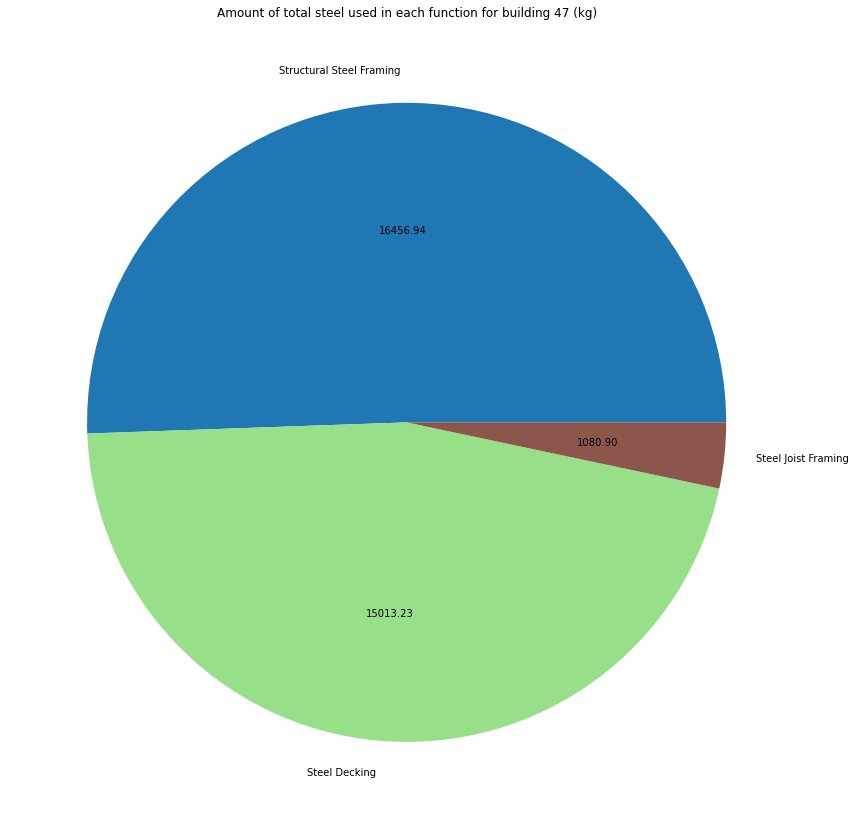

In [22]:
BUILDING_ID = 47
total_steel = steel_df.loc[BUILDING_ID,:].sum()
def my_autopct(pct):
    return ('%.2f' % (pct * total_steel/100)) if pct > 1 else ''
to_plot = steel_df.loc[BUILDING_ID,:].sort_values(ascending=False)
to_plot.plot.pie(figsize=(12,12),colormap='tab20',autopct=my_autopct)
plt.ylabel('')
plt.title(f'Amount of total steel used in each function for building {BUILDING_ID} (kg)');
plt.tight_layout();



Or an entire class of building:

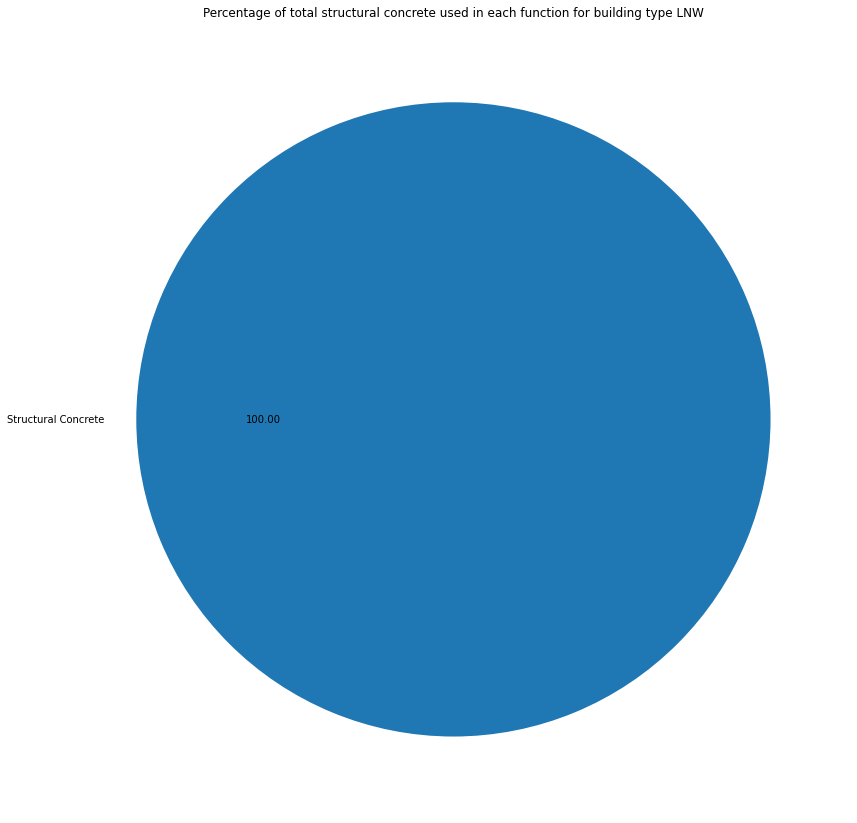

In [23]:
concrete_df = pd.concat([df['Building Type'],df[cols].groupby(f,axis=1).sum()],axis=1)
BUILDING_TYPE = 'LNW'

def my_autopct(pct):
    return ('%.2f' % pct) if pct > 1 else ''
to_plot = concrete_df[concrete_df['Building Type'] == BUILDING_TYPE][concrete_df.columns[1:]].mean().sort_values(ascending=False)
to_plot.plot.pie(figsize=(12,12),colormap='tab20',autopct=my_autopct)
plt.ylabel('')
plt.title(f'Percentage of total structural concrete used in each function for building type {BUILDING_TYPE}');
plt.tight_layout();


We can also calculate the average for each Level 3 MasterFormat code by year of construction:

In [24]:
concrete_df = pd.concat([df[headings[1:]],df[cols].groupby(f,axis=1).sum()],axis=1)
concrete_df.groupby('Construction Date').mean()

,Gross Floor Area,Structural Concrete
Construction Date,,
1913,161.080000,6.597957e+04
1917,199.930000,1.189908e+05
1969,373.605000,1.395402e+05
1988,21934.000000,0.000000e+00
2007,73600.000000,0.000000e+00
2009,73083.000000,0.000000e+00
2011,11282.500000,0.000000e+00
2016,30345.000000,3.441223e+07
2017,39392.013333,3.814654e+07


We can get the average amount of steel in KG used per building type:

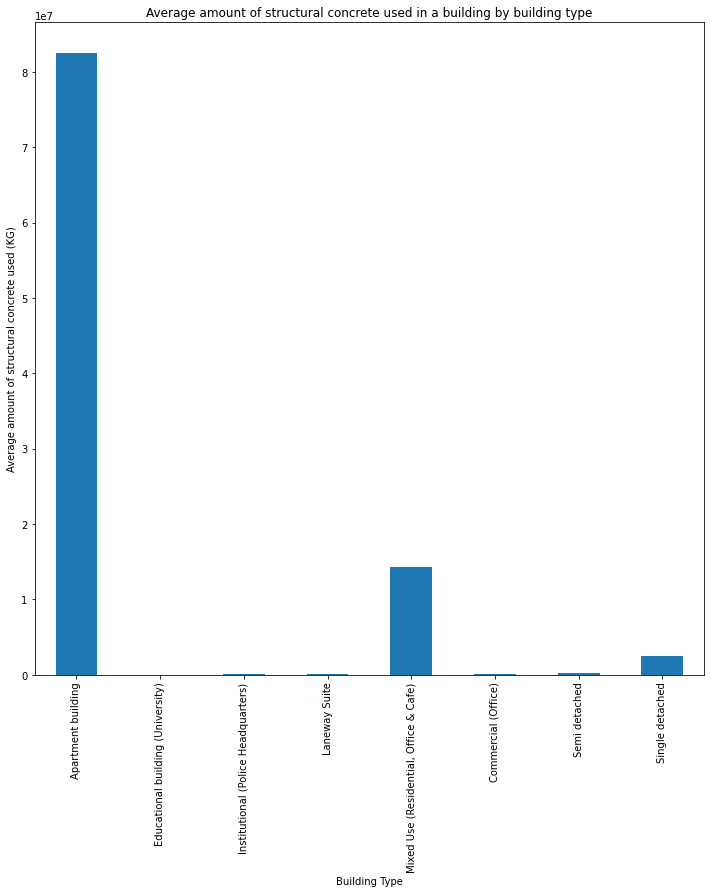

In [25]:
concrete_df.groupby('Building Type').sum().mean(axis=1).rename(index=building_name_map).plot(kind='bar',figsize=(12,12))
plt.ylabel('Average amount of structural concrete used (KG)')
plt.title('Average amount of structural concrete used in a building by building type');

# 3. Uncertainty by Building Type

In this section, we look at the uncertainty code associated with each column. We collect these by building type and then report the number of each value per type of building.

In [26]:
uncertainty_level = {} 
for k,v in df.iterrows():
    #Initialise empty lists for each building type as they occur
    if v['Building Type'] not in uncertainty_level.keys():
        uncertainty_level[v['Building Type']] = []
    #Append the uncertainty value for each column that is non-NaN
    for key in v[~v.isna()].keys()[7:]:
        uncertainty_level[v['Building Type']].append(key.split('_')[-1])

In [27]:
from collections import Counter

In [28]:
for k,v in uncertainty_level.items():
    uncertainty_level[k] = Counter(v) #Construct a Counter object per building type

In [29]:
uncertainty_level

{'SND': Counter({'1': 1720, '2': 711, '4': 349}),
 'OFF': Counter({'1': 494, '3': 307}),
 'APB': Counter({'1': 1171, '2': 1, '3': 971}),
 'SMD': Counter({'1': 191, '2': 61, '4': 27}),
 'EDU': Counter({'1': 93, '3': 24, '2': 6}),
 'INS': Counter({'1': 90, '3': 77, '2': 1}),
 'MIX': Counter({'1': 363, '3': 276}),
 'LNW': Counter({'2': 46, '1': 142, '4': 19})}

Next, we aggregate columns by use code and uncertainty combined, and report the average by building type.

In [30]:
f = lambda x: name_map[re.split('[_\.\ ]',x)[1][0]] + '/' + x.split('_')[-1].split('.')[0] #From a full code, return only the use code and uncertainty code.
by_function_df = pd.concat([df[headings[1:]],df[cols].groupby(f,axis=1).sum()],axis=1)

In [31]:
by_function_df.groupby('Building Type').mean().rename(index=building_name_map)

,Construction Date,Gross Floor Area,Interiors/1,Services/1,Shell/1,Shell/2,Sitework/1,Special Construction And Demolition/1,Substructure/1,Substructure/2,Substructure/4
Building Type,,,,,,,,,,,
Apartment building,2015.80,45505.412000,5330644.80,1525512.0,2.194912e+07,0.0000,23188.8,60316.8,2.053918e+07,0.000000,0.0000
Educational building (University),2016.50,7901.000000,0.00,0.0,0.000000e+00,0.0000,0.0,0.0,0.000000e+00,0.000000,0.0000
Institutional (Police Headquarters),1988.00,21934.000000,0.00,0.0,0.000000e+00,0.0000,0.0,0.0,0.000000e+00,0.000000,0.0000
Laneway Suite,2020.00,150.010000,0.00,0.0,0.000000e+00,0.0000,0.0,0.0,5.821718e+04,44.805527,1850.9675
"Mixed Use (Residential, Office & Cafe)",2018.00,33975.250000,5893176.00,1878144.0,2.306316e+07,0.0000,0.0,62280.0,1.182235e+07,0.000000,0.0000
Commercial (Office),2009.00,52643.666667,0.00,0.0,0.000000e+00,0.0000,0.0,0.0,0.000000e+00,0.000000,0.0000
Semi detached,1994.75,236.615000,0.00,0.0,1.398200e+03,0.0000,0.0,0.0,1.007531e+05,2225.215000,0.0000
Single detached,2015.60,465.227000,282.68,0.0,1.618852e+03,12.2046,0.0,0.0,1.743097e+05,6396.852125,0.0000


Next, we report the total amount of material falling under each uncertainty code by year of construction.

In [32]:
f = lambda x: x.split('_')[-1].split('.')[0] #Select only the uncertainty code.
pd.concat([df[headings[1:]],df[cols].groupby(f,axis=1).sum()],axis=1).groupby('Construction Date').mean()

,Gross Floor Area,1,2,4
Construction Date,,,,
1913,161.080000,6.169728e+04,4282.290000,0.000000
1917,199.930000,1.100899e+05,8900.860000,0.000000
1969,373.605000,1.126800e+05,26860.270500,0.000000
1988,21934.000000,0.000000e+00,0.000000,0.000000
2007,73600.000000,0.000000e+00,0.000000,0.000000
2009,73083.000000,0.000000e+00,0.000000,0.000000
2011,11282.500000,0.000000e+00,0.000000,0.000000
2016,30345.000000,3.441223e+07,0.000000,0.000000
2017,39392.013333,3.814654e+07,0.000000,0.000000


# 4. Material Intensity

We can easily calculate material intensity by dividing columns which are measured in kilograms by the `Gross Floor Area`:

In [33]:
kilogram_columns = [d for d in df.columns if 'kg' in d]
df_mi = df[kilogram_columns].div(df['Gross Floor Area'],axis=0)

In [34]:
kilogram_columns = [d for d in df.columns if 'kg' in d]
df_mi = df[kilogram_columns].div(df['Gross Floor Area'],axis=0)
f = lambda x: name_map[re.split('[_\.\ ]',x)[1][0:3]]
pd.concat([df[headings[1:]],df_mi[kilogram_columns].groupby(f,axis=1).sum()],axis=1)[df['Building Type'] == 'SND']

,Country,City,Quality / Stage of Data,Construction Date,Building Type,Gross Floor Area,Conveying,Exterior Horizontal Enclosures,Exterior Vertical Enclosures,Foundations,...,Interior Finishes,Plumbing,Site Improvements,Slabs-On-Grade,Special Construction,Subgrade Enclosures,Substructure Interior,Substructure Related Activities,Superstructure,Water And Gas Mitigation
0,CA,TOR,00IFC,2021,SND,521.18,0.0,11.137992,136.939623,335.649367,...,8.309413,0.0,0.0,273.972401,0.0,9.652903,0.000000,0.0,30.228003,0.0
1,CA,TOR,00IFC,2021,SND,389.24,0.0,5.461939,69.018253,281.318698,...,6.490936,0.0,0.0,192.874465,0.0,6.851955,0.000000,0.0,26.271523,0.0
2,CA,TOR,00IFC,2021,SND,411.64,0.0,3.786074,101.450370,464.462195,...,4.574905,0.0,0.0,170.733356,0.0,11.298572,0.000000,0.0,23.756286,0.0
3,CA,TOR,00IFC,2021,SND,269.56,0.0,6.503479,188.215196,255.359136,...,8.510443,0.0,0.0,124.186526,0.0,4.351465,0.000000,0.0,30.517748,0.0
6,CA,TOR,00IFC,2021,SND,445.99,0.0,11.933511,61.325975,295.116668,...,6.391063,0.0,0.0,153.061618,0.0,9.478642,0.054452,0.0,39.906513,0.0
7,CA,TOR,00IFC,2021,SND,438.45,0.0,12.707195,130.552921,269.468463,...,6.584780,0.0,0.0,211.910108,0.0,4.218921,0.000000,0.0,39.907474,0.0
8,CA,TOR,00IFC,2021,SND,714.07,0.0,12.865930,104.310510,276.917123,...,6.563894,0.0,0.0,266.709576,0.0,8.902623,0.000000,0.0,38.291591,0.0
9,CA,TOR,00IFC,2021,SND,343.24,0.0,4.300619,210.632241,283.893850,...,8.940907,0.0,0.0,138.510228,0.0,9.601245,0.000000,0.0,35.370538,0.0
12,CA,TOR,00IFC,2021,SND,226.89,0.0,12.424245,186.668275,261.874926,...,6.134611,0.0,0.0,129.263543,0.0,3.818403,0.935612,0.0,35.355314,0.0
13,CA,TOR,00IFC,2021,SND,611.73,0.0,5.140200,102.332008,343.714248,...,7.638991,0.0,0.0,165.513154,0.0,7.722754,0.000000,0.0,33.388004,0.0


In [35]:
master_format_convert = {v:k for k,v in {
    'Concrete':'03',
    'Masonry':'04',
    'Metals':'05',
    'WoodPlasticsAndComposites':'06',
    'ThermalAndMoistureProtection':'07',
    'Finishes':'09',
    'Openings':'08',
    'Earthwork':'31',
    'ExteriorImprovements':'32'
}.items() }

In [36]:
f = lambda x: master_format_convert[re.split('[_\.\ ]',x)[4]]
toplot = pd.concat([df[headings[1:]],df_mi[kilogram_columns].groupby(f,axis=1).sum()],axis=1).sort_values(['Building Type'])

In [37]:
types_to_keep = ['APB','SND','SMD','ADU','SEC','ROW','LNW']
toplot = toplot[toplot['Building Type'].isin(types_to_keep)]

building_type_map = {
    'APB':'Mid to high-rise buildings',
    'SND':'Single family dwellings',
    'SMD':'Single family dwellings',
    'ADU':'Single family dwellings',
    'SEC':'Single family dwellings',
    'ROW':'Single family dwellings',
    'LNW':'Laneway Houses'
}

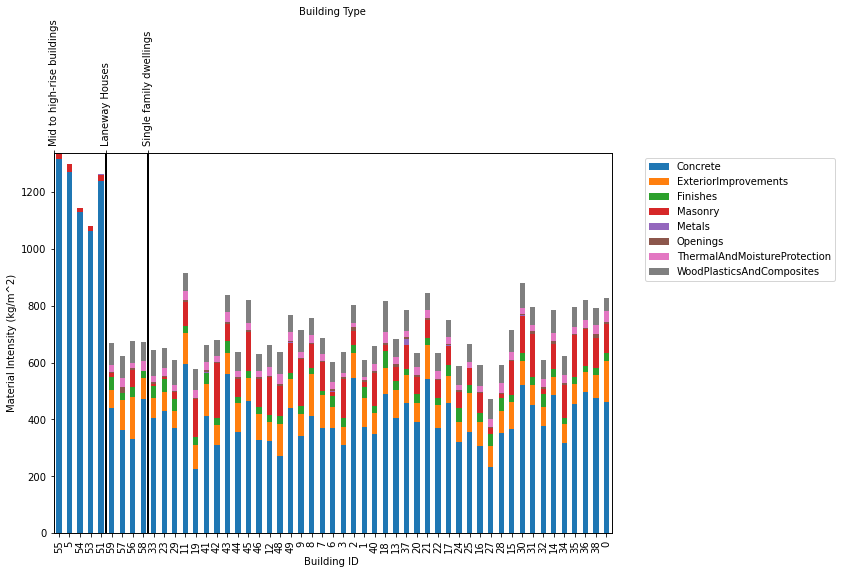

In [38]:
fig, ax = plt.subplots(figsize=(10,7))  

cols = toplot.columns[6:]
margin_bottom = np.zeros(len(toplot))

cmap = plt.get_cmap('tab10')

for num, col in enumerate(cols):
    values = toplot[col].values

    toplot[col].plot.bar(x='Year',y='Value', ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=cmap(num), label=col)
    margin_bottom += values
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Material Intensity (kg/m^2)')
plt.xlabel('Building ID ')
ax2 = ax.twiny()
ax2.set_xlim(0, len(toplot))
ax2.set_xticks([k for k,v in enumerate(toplot['Building Type'].values) if building_type_map[v] != building_type_map[toplot['Building Type'].values[k-1]] or k==0])
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
ax2.set_xticklabels([building_type_map[v] for k,v in enumerate(toplot['Building Type'].values) if building_type_map[v] != building_type_map[toplot['Building Type'].values[k-1]] or k==0])
ax2.set_xlabel("Building Type")
plt.grid(color='black',linewidth=2)

plt.show()


In [39]:
df_mi = df[kilogram_columns].div(df['Gross Floor Area'],axis=0)

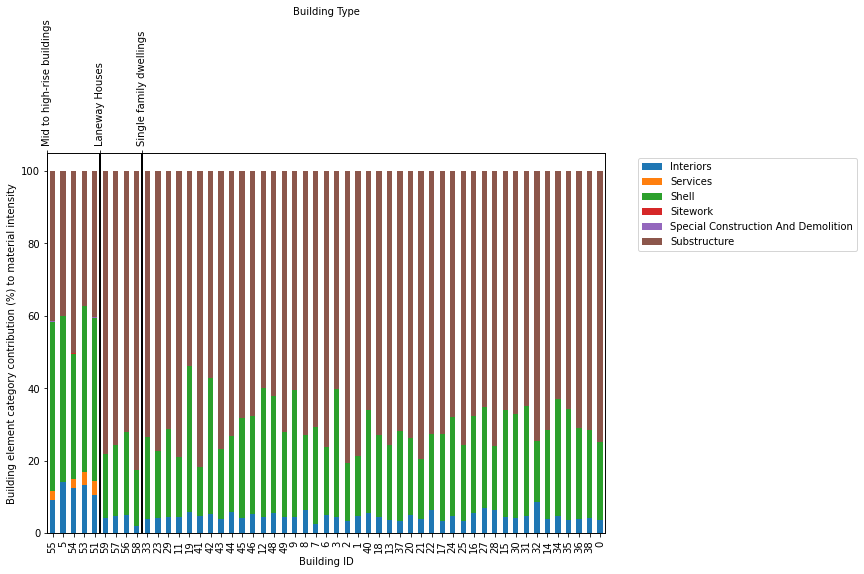

In [40]:
df_mi = df[kilogram_columns].div(df['Gross Floor Area'],axis=0)
df_mi = df_mi.div(df_mi.sum(axis=1),axis=0) * 100
f = lambda x: name_map[re.split('[_\.\ ]',x)[1][0]]
toplot = pd.concat([df[headings[1:]],df_mi[kilogram_columns].groupby(f,axis=1).sum()],axis=1).sort_values('Building Type')
toplot = toplot[toplot['Building Type'].isin(types_to_keep)]

fig, ax = plt.subplots(figsize=(10,7))  

cols = toplot.columns[6:]
margin_bottom = np.zeros(len(toplot))

cmap = plt.get_cmap('tab10')

for num, col in enumerate(cols):
    values = toplot[col].values

    toplot[col].plot.bar(x='Year',y='Value', ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=cmap(num), label=col)
    margin_bottom += values
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Building ID')
plt.ylabel('Building element category contribution (%) to material intensity')

ax2 = ax.twiny()
ax2.set_xlim(0, len(toplot))
ax2.set_xticks([k for k,v in enumerate(toplot['Building Type'].values) if building_type_map[v] != building_type_map[toplot['Building Type'].values[k-1]] or k==0])
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
ax2.set_xticklabels([building_type_map[v] for k,v in enumerate(toplot['Building Type'].values) if building_type_map[v] != building_type_map[toplot['Building Type'].values[k-1]] or k==0])
ax2.set_xlabel("Building Type")
plt.grid(color='black',linewidth=2)
plt.show()

In [41]:
df_mi = df[kilogram_columns].div(df['Gross Floor Area'],axis=0)
df_mi = df_mi.div(df_mi.sum(axis=1),axis=0)
f = lambda x: name_map[re.split('[_\.\ ]',x)[1][0]] + '/' + re.split('[_\.\ ]',x)[-1]
toplot = df_mi[kilogram_columns].groupby(f,axis=1).sum()
for k,v in toplot.iteritems():
    toplot[k] = v * int(k.split('/')[1])
f = lambda x: x.split('/')[0]
toplot = pd.concat([df['Building Type'],toplot.groupby(f,axis=1).sum()],axis=1).sort_values('Building Type')
# toplot['index'] = toplot['index'].astype('str')

In [42]:
toplot['Total'] = toplot[['Interiors','Services','Shell','Sitework','Special Construction And Demolition','Substructure']].sum(axis=1)
toplot = toplot[['Interiors','Shell','Substructure','Total']].reset_index()

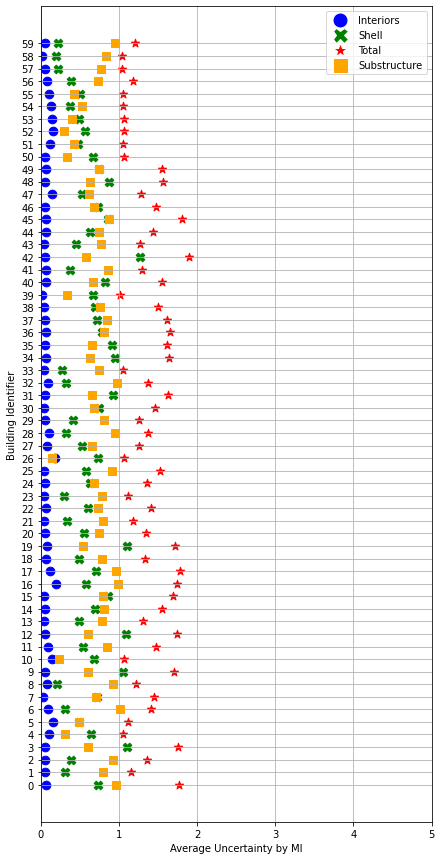

In [51]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(figsize=(7,15)) 
ax.set_xlim(0,5)
ax.set_yticks(toplot.index)
handles = []
for v,m,c in [('Interiors','o','blue'),('Shell','X','green'),('Total','*','red'),('Substructure','s','orange')]:
    toplot.plot.scatter(x=v,y='index', ax=ax, marker=m, color=c, s=75)
    handles.append(
        Line2D([0], [0], marker=m, color='w', label=v,
                              markerfacecolor=c, markersize=15)
    )
plt.legend(handles=handles)
plt.ylabel('Building Identifier')
plt.xlabel('Average Uncertainty by MI')
plt.grid()